<a href="https://colab.research.google.com/github/myllanes/ECGR4105M.Y/blob/main/MichaelYllanes_801299358_Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Michael Yllanes

In [884]:
%matplotlib inline
import numpy as np
import torch
import torch.optim as optim
import time
from sklearn import metrics

# Problem 1a

In [885]:
# My Data
t_c = [1.0,  15.0, 13.0, 31.0, 17.0,-15.0,-10.0, -1.0,  -0.3, 7.0]
t_u = [45.8, 69.0, 11.4, 70.8, 65.6, 15.0, 12.0, 25.2, 25.5, 39.6]
t_c = torch.tensor(t_c).unsqueeze(1)
t_u = torch.tensor(t_u).unsqueeze(1)

t_u.shape

torch.Size([10, 1])

In [886]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices



(tensor([9, 5, 4, 3, 6, 2, 1, 0]), tensor([7, 8]))

In [887]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val



In [888]:
import torch.nn as nn
linear_model = nn.Linear(1, 1)
linear_model(t_un_val)

tensor([[0.5246],
        [0.5304]], grad_fn=<AddmmBackward0>)

In [889]:
linear_model.weight

Parameter containing:
tensor([[0.1930]], requires_grad=True)

In [890]:
linear_model.bias

Parameter containing:
tensor([0.0382], requires_grad=True)

In [891]:
x = torch.ones(1)
linear_model(x)

tensor([0.2312], grad_fn=<ViewBackward0>)

In [892]:
x = torch.ones(10, 1)
linear_model(x)

tensor([[0.2312],
        [0.2312],
        [0.2312],
        [0.2312],
        [0.2312],
        [0.2312],
        [0.2312],
        [0.2312],
        [0.2312],
        [0.2312]], grad_fn=<AddmmBackward0>)

In [893]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(
    linear_model.parameters(),
    lr=1e-2)

In [894]:
linear_model.parameters()

<generator object Module.parameters at 0x7c714fcd2f80>

In [895]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[-0.2474]], requires_grad=True),
 Parameter containing:
 tensor([0.2927], requires_grad=True)]

In [896]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    start_time = time.time()
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val)
        loss_val = loss_fn(t_p_val, t_c_val)

        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")
    print("Training time: {:.2f} seconds".format(time.time() - start_time))

In [897]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 10000,
    optimizer = optimizer,
    model = linear_model,
    loss_fn = loss_fn,
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)


print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 190.1726, Validation loss 2.9703
Epoch 1000, Training loss 86.8269, Validation loss 1.4865
Epoch 2000, Training loss 86.8257, Validation loss 1.4014
Epoch 3000, Training loss 86.8257, Validation loss 1.4010
Epoch 4000, Training loss 86.8257, Validation loss 1.4010
Epoch 5000, Training loss 86.8257, Validation loss 1.4010
Epoch 6000, Training loss 86.8257, Validation loss 1.4010
Epoch 7000, Training loss 86.8257, Validation loss 1.4010
Epoch 8000, Training loss 86.8257, Validation loss 1.4010
Epoch 9000, Training loss 86.8257, Validation loss 1.4010
Epoch 10000, Training loss 86.8257, Validation loss 1.4010
Training time: 5.86 seconds

Parameter containing:
tensor([[4.3520]], requires_grad=True)
Parameter containing:
tensor([-10.5334], requires_grad=True)


In [898]:
linear_model = nn.Linear(1,1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000,
    optimizer = optimizer,
    model = linear_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)


print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 195.2232, Validation loss 5.5493
Epoch 1000, Training loss 86.8272, Validation loss 1.4963
Epoch 2000, Training loss 86.8257, Validation loss 1.4015
Epoch 3000, Training loss 86.8257, Validation loss 1.4010
Training time: 1.65 seconds

Parameter containing:
tensor([[4.3520]], requires_grad=True)
Parameter containing:
tensor([-10.5334], requires_grad=True)


In [899]:
seq_model = nn.Sequential(
            nn.Linear(1, 512),
            nn.Tanh(),
            nn.Linear(512, 1))
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=512, bias=True)
  (1): Tanh()
  (2): Linear(in_features=512, out_features=1, bias=True)
)

In [900]:
[param.shape for param in seq_model.parameters()]

[torch.Size([512, 1]),
 torch.Size([512]),
 torch.Size([1, 512]),
 torch.Size([1])]

In [901]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([512, 1])
0.bias torch.Size([512])
2.weight torch.Size([1, 512])
2.bias torch.Size([1])


In [902]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 512)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(512, 1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=512, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=512, out_features=1, bias=True)
)

In [903]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([512, 1])
hidden_linear.bias torch.Size([512])
output_linear.weight torch.Size([1, 512])
output_linear.bias torch.Size([1])


In [904]:
seq_model.output_linear.bias

Parameter containing:
tensor([0.0228], requires_grad=True)

In [905]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)

train_acc = torch.sum(seq_model(t_un_val) == t_c_val)

final_train_acc = train_acc/512


Epoch 1, Training loss 250.8668, Validation loss 0.8340
Epoch 1000, Training loss 66.6546, Validation loss 59.7236
Epoch 2000, Training loss 58.9487, Validation loss 125.8106
Epoch 3000, Training loss 53.1204, Validation loss 177.4655
Epoch 4000, Training loss 49.2157, Validation loss 202.0722
Epoch 5000, Training loss 46.7334, Validation loss 200.0626
Training time: 4.73 seconds
output tensor([[-14.9610],
        [-14.6245]], grad_fn=<AddmmBackward0>)
answer tensor([[-1.0000],
        [-0.3000]])
hidden tensor([[-1.4663e-04],
        [ 4.4940e-04],
        [ 8.6151e-03],
        [ 1.0705e-03],
        [ 5.4826e-03],
        [ 3.7491e-02],
        [ 2.1473e-03],
        [-9.2055e-06],
        [ 4.8312e-03],
        [-1.3391e-02],
        [ 3.2500e-02],
        [ 4.9954e-03],
        [ 8.4112e-03],
        [-5.4043e-02],
        [-1.3720e-03],
        [-1.9072e-03],
        [-7.3617e-02],
        [ 2.2785e-03],
        [-2.5122e-03],
        [ 6.5053e-02],
        [-5.6346e-02],
       

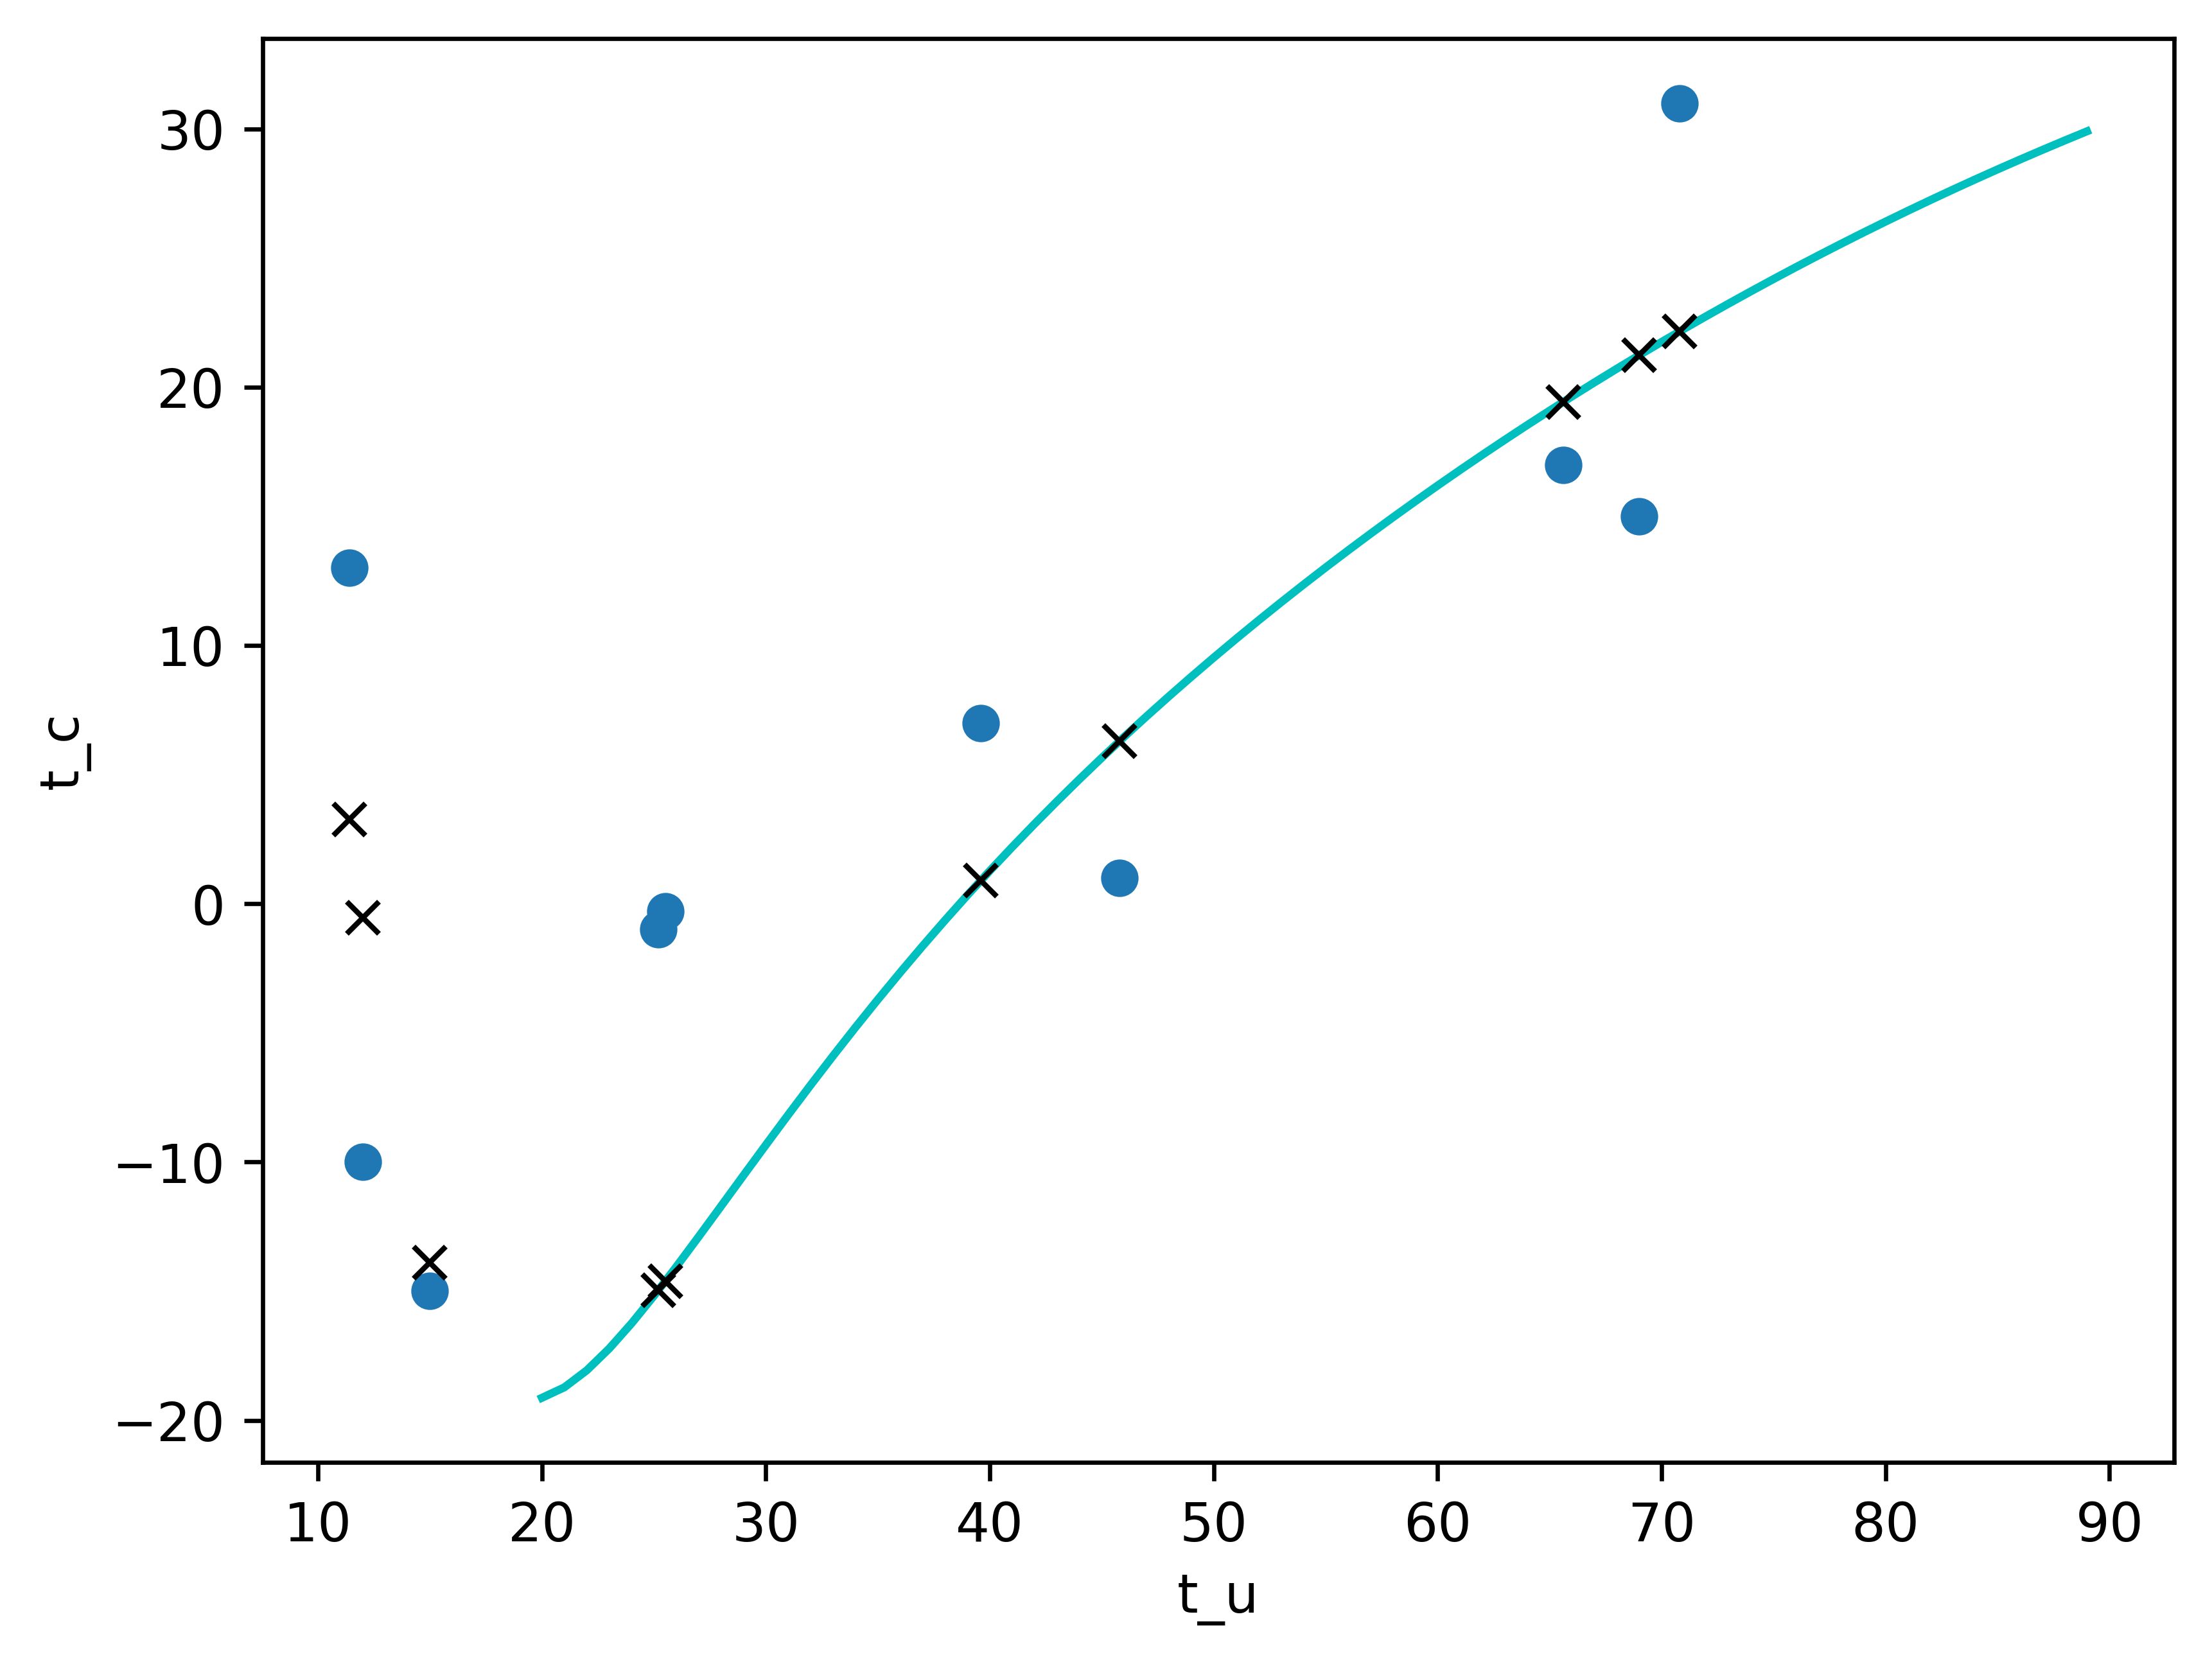

In [906]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=600)
plt.xlabel("t_u")
plt.ylabel("t_c")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')

My training loss is 66.6546, 58.9487, 53.1204, 49.2157, 46.7334 with a 64% evaluation accuracy. The training time took 4.73 seconds which isnt that long to train this model. It was a very quick as the epochs increases by a 1000 intervals. My training level off at around 36 which isnt too good, as the training loss didnt decrease that much.

# Problem 1b

Epoch 1, Training loss 252.3855, Validation loss 0.5059
Epoch 1000, Training loss 78.0162, Validation loss 9.7742
Epoch 2000, Training loss 58.8515, Validation loss 114.7309
Epoch 3000, Training loss 43.3150, Validation loss 134.2839
Epoch 4000, Training loss 35.5183, Validation loss 43.8640
Epoch 5000, Training loss 31.9772, Validation loss 7.2117
Training time: 7.63 seconds


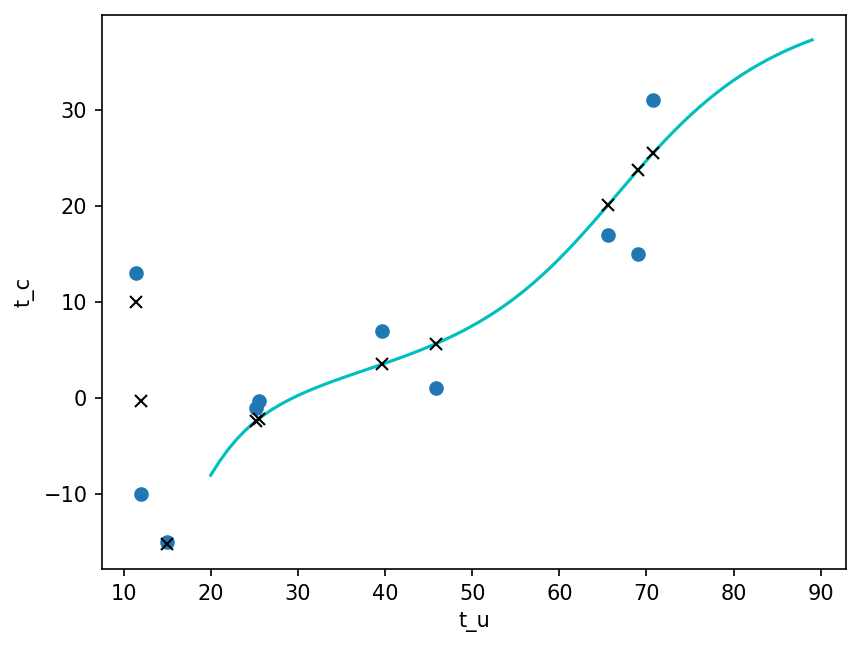

In [907]:
Hidden_1 = 512
Hidden_2 = 256
Hidden_3 = 128

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear1', nn.Linear(1, Hidden_1)),
    ('hidden_activation1', nn.Tanh()),
    ('hidden_linear2', nn.Linear(Hidden_1, Hidden_2)),
    ('hidden_activation2', nn.Tanh()),
    ('hidden_linear3', nn.Linear(Hidden_2, Hidden_3)),
    ('hidden_activation3', nn.Tanh()),
    ('output_linear', nn.Linear(Hidden_3, 1))
]))

optimizer = optim.SGD(seq_model.parameters(), lr=1e-4)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)

from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=150)
plt.xlabel("t_u")
plt.ylabel("t_c")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')

With the additional layer my training loss is 78.0162, 58.8515, 43.3150, 35.5183, and 31.9772. It kept decreaseing unlike my model with 1 hidden layer the accuray went up to 70 percent with is shown on the graph. Its a bit more curve and its not over fitting. The time it took for this model is 7.63 seconds which is double the amount form the previous graph. This is partialy due to addding in the extra layers. This model is suitable for achieving good accuracy without overfitting on the data.